In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('kc_house_data.csv')
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [5]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [6]:
df.corr()['price']

id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

In [10]:
fd  = df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms']]
fd.head()

sqft_living  grade  sqft_above  sqft_living15  bathrooms
0         1180      7        1180           1340       1.00
1         2570      7        2170           1690       2.25
2          770      6         770           2720       1.00
3         1960      7        1050           1360       3.00
4         1680      8        1680           1800       2.00

In [14]:
fd.describe()

sqft_living         grade    sqft_above  sqft_living15     bathrooms
count  21613.000000  21613.000000  21613.000000   21613.000000  21613.000000
mean    2079.899736      7.656873   1788.390691    1986.552492      2.114757
std      918.440897      1.175459    828.090978     685.391304      0.770163
min      290.000000      1.000000    290.000000     399.000000      0.000000
25%     1427.000000      7.000000   1190.000000    1490.000000      1.750000
50%     1910.000000      7.000000   1560.000000    1840.000000      2.250000
75%     2550.000000      8.000000   2210.000000    2360.000000      2.500000
max    13540.000000     13.000000   9410.000000    6210.000000      8.000000

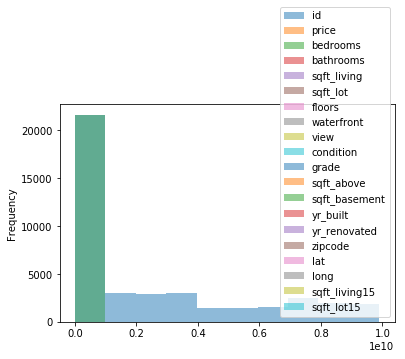

In [19]:
df.plot.hist(alpha=0.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000208F0678D68>,
      dtype=object)

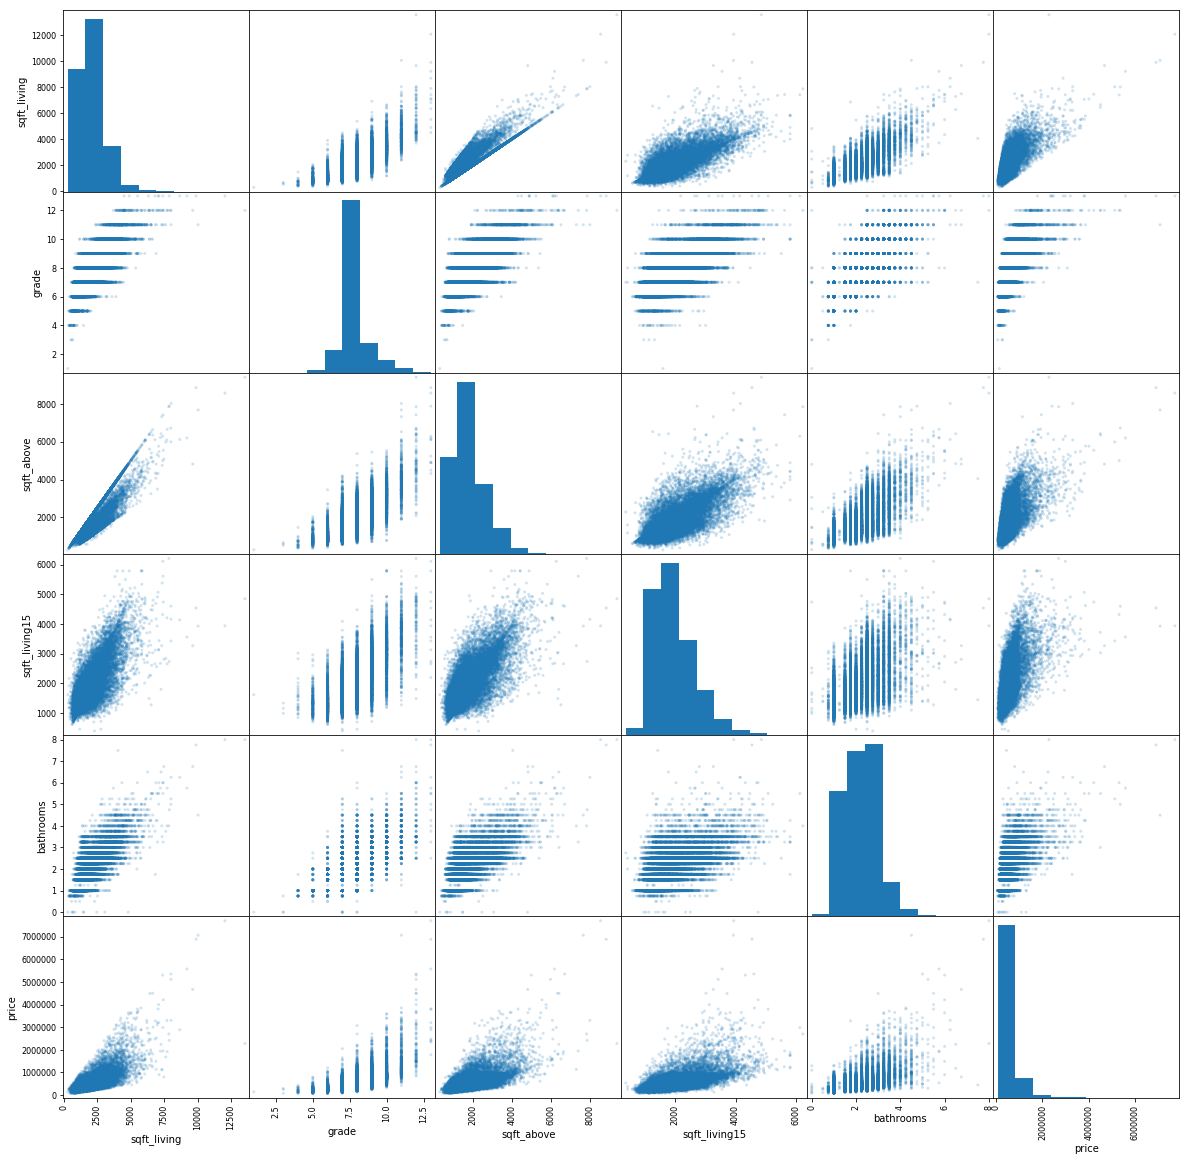

In [11]:
pd.plotting.scatter_matrix(df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms','price']],alpha=0.2,figsize=(20,20))

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms','price']])
# scaler['price']

C:\Users\PRINCE\Anaconda3\envs\Pandas\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [12]:
import sklearn 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(fd,df['price'])


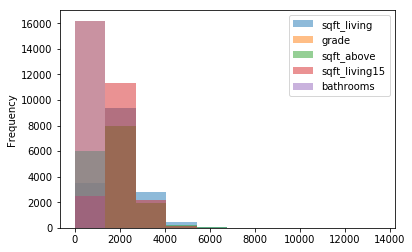

In [20]:
x_train.plot.hist(alpha=0.5)

In [38]:
from sklearn.preprocessing import StandardScaler
import numpy as np
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(np.array(y_train).reshape(-1,1))
y_test = sc_y.transform(np.array(y_test).reshape(-1,1))

In [40]:
from sklearn.linear_model import LinearRegression
line = LinearRegression().fit(x_train,y_train)

In [41]:
from sklearn.metrics import r2_score
y_pred = line.predict(x_test)

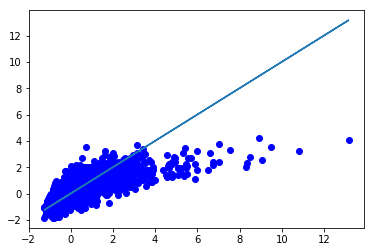

In [42]:
plt.plot(y_test,y_pred,'bo')
plt.plot(y_test,y_test)

In [43]:
r2score = r2_score(y_test,y_pred)
r2score

0.55056853259642

In [71]:
# 9652176468

from sklearn.preprocessing import PolynomialFeatures
plFtr = PolynomialFeatures(degree=3)
x_poly = plFtr.fit_transform(x_train)
x_testpoly = plFtr.fit_transform(x_test)

plFtr.fit(x_poly,y_train)
lnrg = LinearRegression().fit(x_poly,y_train)
y_predpoly = lnrg.predict(x_testpoly)




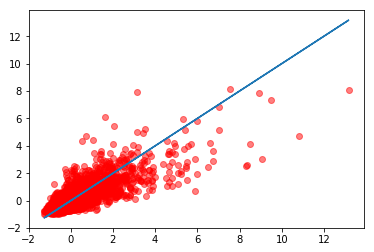

In [72]:
plt.plot(y_test,y_predpoly,'ro',alpha=0.5)
plt.plot(y_test,y_test)

In [73]:
r2score = r2_score(y_test,y_predpoly)

In [74]:
r2score

0.6311182783857641

In [62]:
# 9652176468

from sklearn.preprocessing import PolynomialFeatures
plFtr = PolynomialFeatures(degree=3)
x_poly = plFtr.fit_transform(x_train)
x_testpoly = plFtr.fit_transform(x_test)

plFtr.fit(x_poly,y_train)
lnrg = LinearRegression().fit(x_poly,y_train)
y_predpoly = lnrg.predict(x_testpoly)




IndexError: too many indices for array